##  Rozwiązywanie układu równań liniowych metodami rozkładu LU 

Podaj zasadę działania metod opartych o dekompozycję LU. 
#### Imports

In [5]:
import numpy as np
import scipy as sp
import scipy.linalg
from math import sqrt
import time
from random import randrange
import matplotlib.pyplot as plt
from tabulate import tabulate

#### Zadanie 1
Zaimplementuj metody rozkładu LU:
- Rozkład Crouta 
- Rozkład Doolitla
- Rozkład Choleskyego 

Dla każdej z metod podaj warunki niezbędne aby można ją było zastosować. Sprawdź poprawność działania tych metod. 
Przetestuj wydajność algorytmów dla kilku rozmiarów macierzy (podobnie jak w ćwiczeniu 9).

In [2]:
def crout(M):
    n = len(M)
    L = np.zeros((n, n))
    U = np.zeros((n, n))

    for k in range(0, n):
        U[k, k] = 1 
        for j in range(k, n):
            sum0 = sum([L[j, s] * U[s, k] for s in range(0, j)])
            L[j, k] = M[j, k] - sum0

        for j in range(k+1, n):
            sum1 = sum([L[k, s] * U[s, j] for s in range(0, k)]) 
            U[k, j] = (M[k, j] - sum1) / L[k, k]
    return L,U


def doolitl(M):
    n = len(M)
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    
    for i in range(n): 
        for k in range(i, n):  
            sum = 0; 
            for j in range(i): 
                sum += (L[i][j] * U[j][k]); 
            U[i][k] = M[i][k] - sum; 
        for k in range(i, n): 
            if (i == k): 
                L[i][i] = 1;
            else:  
                sum = 0; 
                for j in range(i): 
                    sum += (L[k][j] * U[j][i]); 
                L[k][i] = ((M[k][i] - sum) / U[i][i]);
    return L,U


def cholesky(M):
    n = len(M)
    L = np.zeros((n, n))

    for i in xrange(n):
        for k in xrange(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in xrange(k))
            
            if (i == k):
                L[i][k] = sqrt(M[i][i] - tmp_sum)
            else:
                L[i][k] = (1.0 / L[k][k] * (M[i][k] - tmp_sum))
    return L,L.T 

Warunki dla każdej z metod niezbędne, aby można było ją zastosować:

- metoda rozkładu Crouta — jako parametr przyjmuje dowolną macierz
- metoda rozkładu Doolitla — jako parametr przyjmuje dowolną macierz
- metoda rozkładu Choleskyego — jako parametr przyjmuje rzeczywistą, symetryczną, dodatnio określoną macierz

In [3]:
print("Correct scipy lower and upper matrices:")
A = sp.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
_, L, U = sp.linalg.lu(A)

print("Lower:")
print(L)
print("Upper:")
print(U)

print("Crout method lower and upper matrices:")
L1, U1 = crout(A)

print("Lower:")
print(L1)
print("Upper:")
print(U1)

print("Doolitl method lower and upper matrices:")
L2, U2 = doolitl(A)

print("Lower:")
print(L2)
print("Upper:")
print(U2)

print("Cholesky method correct scipy lower and upper matrices:")
B = sp.array([[6, 3, 4, 8], [3, 6, 5, 1], [4, 5, 10, 7], [8, 1, 7, 25]])
L3 = sp.linalg.cholesky(B, lower=True)
U3 = sp.linalg.cholesky(B, lower=False)

print("Lower:")
print(L3)
print("Upper:")
print(U3)

print("Cholesky method lower and upper matrices:")
L4, U4 = cholesky(B)


print("Lower:")
print(L4)
print("Upper:")
print(U4)

Correct scipy lower and upper matrices:
Lower:
[[ 1.          0.          0.          0.        ]
 [ 0.42857143  1.          0.          0.        ]
 [-0.14285714  0.21276596  1.          0.        ]
 [ 0.28571429 -0.72340426  0.08982036  1.        ]]
Upper:
[[ 7.          3.         -1.          2.        ]
 [ 0.          6.71428571  1.42857143 -4.85714286]
 [ 0.          0.          3.55319149  0.31914894]
 [ 0.          0.          0.          1.88622754]]
Crout method lower and upper matrices:
Lower:
[[ 7.          0.          0.          0.        ]
 [ 3.          6.71428571  0.          0.        ]
 [-1.          1.42857143  3.55319149  0.        ]
 [ 2.         -4.85714286  0.31914894  1.88622754]]
Upper:
[[ 1.          0.42857143 -0.14285714  0.28571429]
 [ 0.          1.          0.21276596 -0.72340426]
 [ 0.          0.          1.          0.08982036]
 [ 0.          0.          0.          1.        ]]
Doolitl method lower and upper matrices:
Lower:
[[ 1.          0.        

Jak widać zaimplementowane algorytmy działają poprawnie

#### Zadanie 2
Zapoznaj się z funkcją rozwiązywania układów równań liniowych dostarczoną przez bibliotekę numpy/scipy. Porównaj jej wydajność z własnymi implementacjami.  

  Crout method    Doolitl method    Scipy method    Cholesky method    Matrix size
--------------  ----------------  --------------  -----------------  -------------
   0.017056          0.0124631       0.000241041        0.00724697              38
   0.195422          0.10113         0.000622988        0.054754                89
   0.107029          0.0529139       0.00049305         0.0196321               62
   0.00396991        0.00368404      8.2016e-05         0.00229096              20
   0.0115039         0.0106211       0.000126123        0.00619793              29
   0.0326462         0.0372858       0.000268936        0.0230691               41
   0.219286          0.108665        0.000626087        0.0564699               87
   0.0141261         0.014389        0.000226021        0.00899696              30
   0.0764842         0.062717        0.000643015        0.0142159               49
   0.041621          0.0389659       0.000227928        0.0221591               40
   0

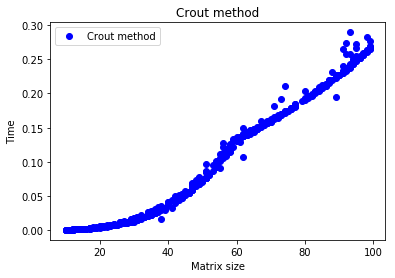

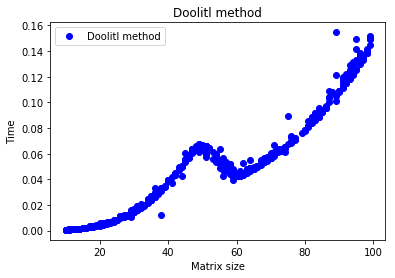

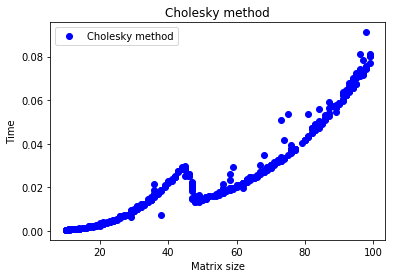

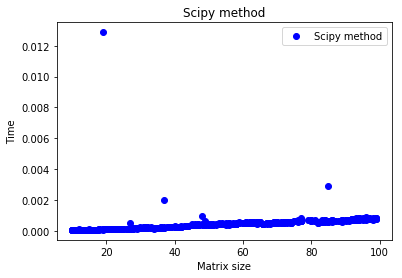

In [11]:
crout_list = []
doolitl_list = []
cholesky_list = []
scipy_list = []
matrix_size_list = []


def test():
    n = randrange(10, 100)
    A = np.random.rand(n, n)
    B = sp.array(np.dot(A, A.transpose()).tolist())

    s1_time = time.time()
    crout(B)
    e1_time = time.time()

    s2_time = time.time()
    doolitl(B)
    e2_time = time.time()

    s3_time = time.time()
    cholesky(B)
    e3_time = time.time()

    s4_time = time.time()
    sp.linalg.lu(A)
    e4_time = time.time()

    return e1_time - s1_time, e2_time - s2_time, e3_time - s3_time, e4_time - s4_time, n


def show_results():
    print(tabulate({"Crout method": crout_list, "Doolitl method": doolitl_list, "Cholesky method": cholesky_list, "Scipy method": scipy_list, "Matrix size": matrix_size_list}, headers="keys"))


def show_diagram(values, sizes, title):
    plt.plot(sizes, values, 'bo', label=title)
    plt.xlabel("Matrix size")
    plt.ylabel("Time")
    plt.title(title)
    plt.legend()
    plt.show()
    

for i in range(500):
    crout_time, doolitl_time, cholesky_time, scipy_time, n = test()
    crout_list.append(crout_time)
    doolitl_list.append(doolitl_time)
    cholesky_list.append(cholesky_time)
    scipy_list.append(scipy_time)
    matrix_size_list.append(n)

show_results()
show_diagram(crout_list, matrix_size_list, "Crout method")
show_diagram(doolitl_list, matrix_size_list, "Doolitl method")
show_diagram(cholesky_list, matrix_size_list, "Cholesky method")
show_diagram(scipy_list, matrix_size_list, "Scipy method")

Powyrzej przedstawiona implementacja testu pomiaru wydajności róznych metod. Testy były uruchomione na rzeczywistych, symetrycznych, dodatnio określonych macierzach. Z testów można wewnioskować, że funkcja z biblioteki scipy działa najszybczej, metoda rozkładu Choleskyego jest na drugim miejscu, dalej idzie metoda rozkładu Doolitla i na koniec metoda rozkładu Crouta.